# Подключение библиотек

In [56]:
import matplotlib.pylab as plt
import numpy as np
%matplotlib inline

# Сетка

In [98]:
ys = [0.0, 0.00017, 0.00199, 0.01282, 0.05744]
xs = [0.52360, 0.87267, 1.22173, 1.57080, 1.91986]


# Поиск коэффициентов

In [99]:
diffs = []
diffs.append([ys[i] for i in range(5)])
while len(diffs[-1]) > 1:
    diffs.append([(diffs[-1][i + 1] - diffs[-1][i]) / (xs[i + len(diffs)] - xs[i]) for i in range(len(diffs[-1]) - 1)])

In [100]:
for d in diffs:
    print (d)

[0.0, 0.00017, 0.00199, 0.01282, 0.05744]
[0.0004870083364368179, 0.005214003323210909, 0.03102529578594551, 0.12782902652839057]
[0.006770938058490668, 0.03697204311909616, 0.13866146812548533]
[0.028839863503251992, 0.09710694812439878]
[0.048892816969007775]


# Функции для работы с многочленами

In [60]:
def add_poly(p, q):
    r = []
    for i in range(max(len(p), len(q))):
        c = 0
        if i < len(p):
            c += p[i]
        if i < len(q):
            c += q[i]
        r.append(c)
    return r

In [61]:
def scale_poly(d, p):
    r = []
    for i in range(len(p)):
        r.append(p[i] * d)
    return r

In [62]:
def mult_poly(p, q):
    r = [0 for i in range(len(p) + len(q) - 1)]
    for i in range(len(p)):
        for j in range(len(q)):
            r[i + j] += p[i] * q[j]
    return r

In [63]:
def eval_poly(p):
    def fun(x):
        xi = 1
        s = 0
        for i in range(len(p)):
            s += p[i] * xi
            xi *= x
        return s
    return fun

In [64]:
def deriv_poly(p):
    return [p[i] * i for i in range(1, len(p))]

# Составление многочлена

In [65]:
poly = []
for n in range(len(xs)):
    term = [1]
    for i in range(n):
        term = mult_poly(term, [-xs[i], 1])
    term = scale_poly(diffs[n][0], term)
    poly = add_poly(poly, term)
print(np.poly1d(poly))

         4        3          2
0.02961 x - 0.14 x + 0.2381 x - 0.176 x + 0.04889


# Построение интерполяционного многочлена Ньютона

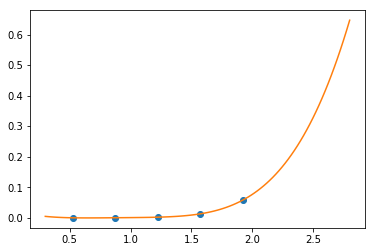

In [66]:
xgr = numpy.linspace(0.3, 2.8, 100)
plt.plot(xs, ys, 'o', xgr, [eval_poly(poly)(x) for x in xgr])

# Вычисление коэффициентов элементов сплайна

In [67]:
def cspline(i):
    f = eval_poly(poly)
    df = eval_poly(deriv_poly(poly))
    xl = xs[i]
    xr = xs[i + 1]
    fl = f(xl)
    fr = f(xr)
    dfl = df(xl)
    dfr = df(xr)
    return [
        (-dfr * xl**2 * xr * (xr - xl) + fr * xl**2 * (3*xr - xl) + fl * xr**2 * (xr - 3*xl) - dfl * xl * xr**2 * (xr - xl)) / (xr - xl) ** 3,
        (dfr * xl * (2*xr + xl) * (xr - xl) - 6*(fr - fl)*xl*xr + dfl * xr * (xr + 2*xl) * (xr - xl)) / (xr - xl) ** 3,
        (-dfr * (xr - xl) * (xr + 2*xl) + 3*(fr - fl) * (xr + xl) - dfl * (xr - xl) * (xl + 2*xr)) / (xr - xl) ** 3,
        (dfr * (xr - xl) - 2*(fr - fl) + dfl * (xr - xl)) / (xr - xl) ** 3,
    ]

In [68]:
for i in range(4):
    print(cspline(i))

[0.019404737256784713, -0.07760397010155713, 0.09807674866621226, -0.039427221117895664]
[-0.025964241892935638, 0.07836242887417517, -0.08064682020737808, 0.02883986350325304]
[-0.15045549790786994, 0.3840545691664579, -0.3308589974253837, 0.09710694812439995]
[-0.4150450261060874, 0.8893826992975917, -0.6525604656586516, 0.16537403274554624]


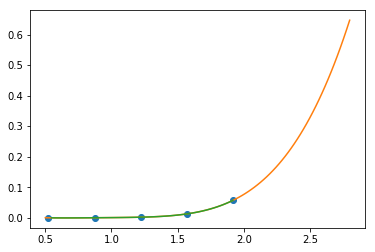

In [69]:
splines = [cspline(i) for i in range(len(xs) - 1)]

def interpolated(x):
    for i in range(len(xs) - 1):
        if x >= xs[i] and x <= xs[i + 1]:
            return eval_poly(splines[i])(x)
    return None

xs_ = numpy.linspace(0.5, 2.8, 100)
plt.plot(xs, ys, 'o', xs_, [eval_poly(poly)(x) for x in xs_], xs_, [interpolated(x) for x in xs_])

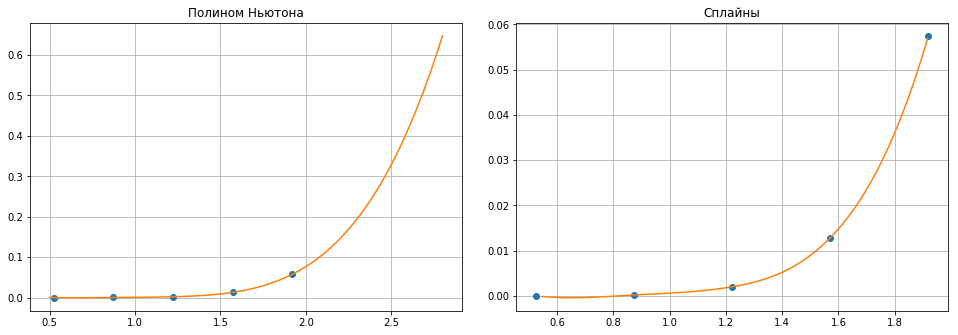

In [94]:
xs_ = numpy.linspace(0.5, 2.8, 100)
xgr = numpy.linspace(0.5, 2.8, 100)
fig = plt.figure()
ax1 = fig.add_axes([0.125, 0.547727, 1, 1]) 
ax1.set_title(u'Полином Ньютона')
ax2 = fig.add_axes([1.25, 0.547727, 1, 1]) 
ax2.set_title(u'Сплайны')
for ax in fig.axes:
    ax.grid(True)
ax1.plot(xs, ys, 'o', xgr, [eval_poly(poly)(x) for x in xgr])
ax2.plot(xs, ys, 'o', xs_, [interpolated(x) for x in xs_])

(-0.005, 0.008)

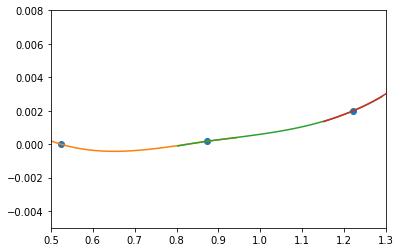

In [43]:
plt.plot(xs, ys, 'o')
for i in range(len(xs) - 1):
    l = numpy.linspace(xs[i] - 0.2*(xs[i + 1] - xs[i]), xs[i + 1] + 0.2*(xs[i + 1] - xs[i]), 100)
    plt.plot(l, [eval_poly(splines[i])(x) for x in l])
plt.xlim([0.5, 1.3])
plt.ylim([-0.005, 0.008])